## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.058940 -1.288992  1.753788 -0.700943  1.282409 -0.297894
1  0.618697  1.554687  1.175784  0.115071  0.536973  1.184267
2  1.504330  0.083965 -0.648390  0.192459 -0.526616  0.759654
3 -1.404429  0.717858  0.808827 -1.473648 -0.318639 -1.695709
4  0.688933  1.286043  0.066023 -1.669728  0.547277 -0.273866


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0073003	total: 58ms	remaining: 57.9s
1:	learn: 0.9969998	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9869423	total: 59ms	remaining: 19.6s
3:	learn: 0.9759360	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9671571	total: 60ms	remaining: 11.9s
5:	learn: 0.9574081	total: 60.4ms	remaining: 10s
6:	learn: 0.9473158	total: 61ms	remaining: 8.65s
7:	learn: 0.9368569	total: 61.5ms	remaining: 7.63s
8:	learn: 0.9284377	total: 62ms	remaining: 6.82s
9:	learn: 0.9189959	total: 62.4ms	remaining: 6.18s
10:	learn: 0.9084254	total: 62.8ms	remaining: 5.65s
11:	learn: 0.8982340	total: 63.5ms	remaining: 5.22s
12:	learn: 0.8880115	total: 64ms	remaining: 4.86s
13:	learn: 0.8784478	total: 64.4ms	remaining: 4.54s
14:	learn: 0.8718484	total: 64.8ms	remaining: 4.26s
15:	learn: 0.8643757	total: 65.3ms	remaining: 4.02s
16:	learn: 0.8562610	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8483429	total: 66.2ms	remaining: 3.61s
18:	learn: 0.8407563	total: 66.6ms	remaining: 3.44s
19:	lea

104:	learn: 0.4015613	total: 109ms	remaining: 925ms
105:	learn: 0.3980000	total: 109ms	remaining: 921ms
106:	learn: 0.3942574	total: 110ms	remaining: 916ms
107:	learn: 0.3912623	total: 110ms	remaining: 910ms
108:	learn: 0.3884878	total: 111ms	remaining: 904ms
109:	learn: 0.3855949	total: 111ms	remaining: 899ms
110:	learn: 0.3824086	total: 111ms	remaining: 893ms
111:	learn: 0.3793327	total: 112ms	remaining: 888ms
112:	learn: 0.3763177	total: 113ms	remaining: 884ms
113:	learn: 0.3733387	total: 113ms	remaining: 879ms
114:	learn: 0.3701050	total: 114ms	remaining: 874ms
115:	learn: 0.3673812	total: 115ms	remaining: 874ms
116:	learn: 0.3644078	total: 115ms	remaining: 870ms
117:	learn: 0.3620811	total: 116ms	remaining: 865ms
118:	learn: 0.3594724	total: 116ms	remaining: 860ms
119:	learn: 0.3568567	total: 117ms	remaining: 855ms
120:	learn: 0.3547028	total: 117ms	remaining: 851ms
121:	learn: 0.3517430	total: 118ms	remaining: 846ms
122:	learn: 0.3495007	total: 118ms	remaining: 841ms
123:	learn: 

264:	learn: 0.1448060	total: 187ms	remaining: 518ms
265:	learn: 0.1437259	total: 187ms	remaining: 516ms
266:	learn: 0.1433737	total: 187ms	remaining: 515ms
267:	learn: 0.1431358	total: 188ms	remaining: 513ms
268:	learn: 0.1425800	total: 188ms	remaining: 511ms
269:	learn: 0.1416026	total: 189ms	remaining: 510ms
270:	learn: 0.1411098	total: 189ms	remaining: 509ms
271:	learn: 0.1406157	total: 190ms	remaining: 507ms
272:	learn: 0.1394615	total: 190ms	remaining: 506ms
273:	learn: 0.1390649	total: 191ms	remaining: 505ms
274:	learn: 0.1387638	total: 191ms	remaining: 503ms
275:	learn: 0.1376910	total: 191ms	remaining: 502ms
276:	learn: 0.1374707	total: 192ms	remaining: 500ms
277:	learn: 0.1370994	total: 192ms	remaining: 499ms
278:	learn: 0.1360853	total: 193ms	remaining: 498ms
279:	learn: 0.1358707	total: 193ms	remaining: 496ms
280:	learn: 0.1348553	total: 194ms	remaining: 495ms
281:	learn: 0.1338285	total: 194ms	remaining: 494ms
282:	learn: 0.1336139	total: 194ms	remaining: 492ms
283:	learn: 

487:	learn: 0.0404354	total: 291ms	remaining: 305ms
488:	learn: 0.0401875	total: 292ms	remaining: 305ms
489:	learn: 0.0399327	total: 292ms	remaining: 304ms
490:	learn: 0.0398809	total: 293ms	remaining: 303ms
491:	learn: 0.0396881	total: 293ms	remaining: 303ms
492:	learn: 0.0394989	total: 294ms	remaining: 302ms
493:	learn: 0.0394481	total: 294ms	remaining: 301ms
494:	learn: 0.0392011	total: 295ms	remaining: 301ms
495:	learn: 0.0391512	total: 296ms	remaining: 301ms
496:	learn: 0.0388797	total: 296ms	remaining: 300ms
497:	learn: 0.0388308	total: 297ms	remaining: 299ms
498:	learn: 0.0387824	total: 297ms	remaining: 298ms
499:	learn: 0.0385514	total: 298ms	remaining: 298ms
500:	learn: 0.0385036	total: 298ms	remaining: 297ms
501:	learn: 0.0384563	total: 298ms	remaining: 296ms
502:	learn: 0.0382066	total: 299ms	remaining: 295ms
503:	learn: 0.0381602	total: 299ms	remaining: 295ms
504:	learn: 0.0379259	total: 300ms	remaining: 294ms
505:	learn: 0.0377031	total: 300ms	remaining: 293ms
506:	learn: 

650:	learn: 0.0197712	total: 370ms	remaining: 198ms
651:	learn: 0.0196382	total: 370ms	remaining: 198ms
652:	learn: 0.0195088	total: 371ms	remaining: 197ms
653:	learn: 0.0194613	total: 371ms	remaining: 196ms
654:	learn: 0.0193432	total: 371ms	remaining: 196ms
655:	learn: 0.0192968	total: 372ms	remaining: 195ms
656:	learn: 0.0192030	total: 372ms	remaining: 194ms
657:	learn: 0.0191113	total: 373ms	remaining: 194ms
658:	learn: 0.0190258	total: 373ms	remaining: 193ms
659:	learn: 0.0189088	total: 374ms	remaining: 193ms
660:	learn: 0.0188248	total: 374ms	remaining: 192ms
661:	learn: 0.0187352	total: 375ms	remaining: 191ms
662:	learn: 0.0186583	total: 375ms	remaining: 191ms
663:	learn: 0.0185646	total: 376ms	remaining: 190ms
664:	learn: 0.0184783	total: 376ms	remaining: 190ms
665:	learn: 0.0183687	total: 377ms	remaining: 189ms
666:	learn: 0.0182528	total: 377ms	remaining: 188ms
667:	learn: 0.0181427	total: 377ms	remaining: 188ms
668:	learn: 0.0180610	total: 378ms	remaining: 187ms
669:	learn: 

877:	learn: 0.0073902	total: 475ms	remaining: 66ms
878:	learn: 0.0073763	total: 475ms	remaining: 65.5ms
879:	learn: 0.0073699	total: 476ms	remaining: 64.9ms
880:	learn: 0.0073418	total: 476ms	remaining: 64.3ms
881:	learn: 0.0073284	total: 477ms	remaining: 63.8ms
882:	learn: 0.0073153	total: 477ms	remaining: 63.2ms
883:	learn: 0.0072913	total: 478ms	remaining: 62.7ms
884:	learn: 0.0072785	total: 478ms	remaining: 62.1ms
885:	learn: 0.0072373	total: 479ms	remaining: 61.6ms
886:	learn: 0.0072311	total: 479ms	remaining: 61ms
887:	learn: 0.0071908	total: 480ms	remaining: 60.5ms
888:	learn: 0.0071676	total: 480ms	remaining: 59.9ms
889:	learn: 0.0071553	total: 481ms	remaining: 59.4ms
890:	learn: 0.0071491	total: 481ms	remaining: 58.9ms
891:	learn: 0.0071099	total: 482ms	remaining: 58.3ms
892:	learn: 0.0070839	total: 482ms	remaining: 57.8ms
893:	learn: 0.0070778	total: 483ms	remaining: 57.2ms
894:	learn: 0.0070659	total: 483ms	remaining: 56.7ms
895:	learn: 0.0070276	total: 483ms	remaining: 56.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

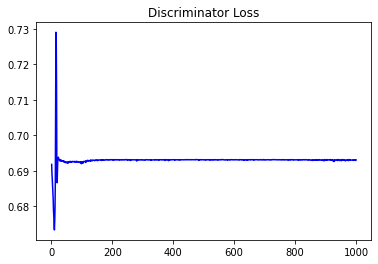

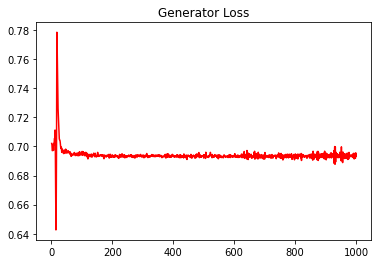

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05307991065770248


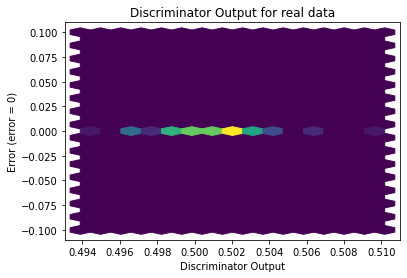

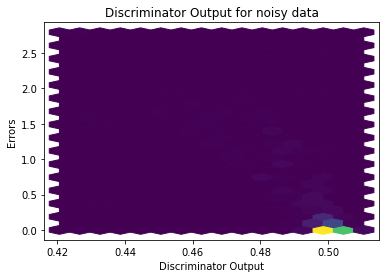

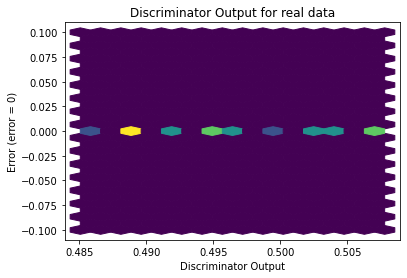

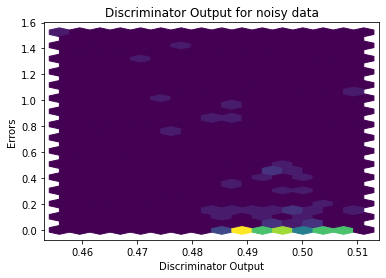

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


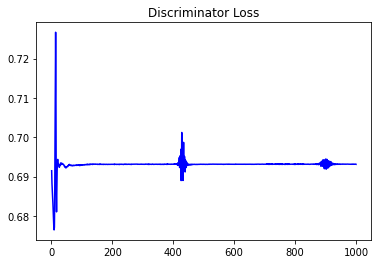

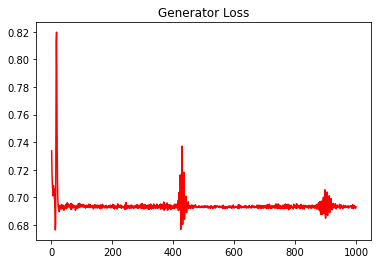

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07232420483511612


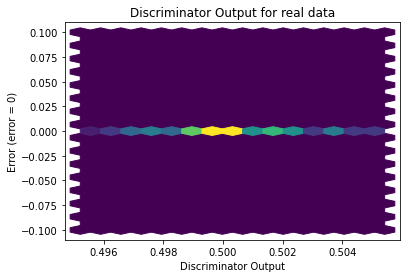

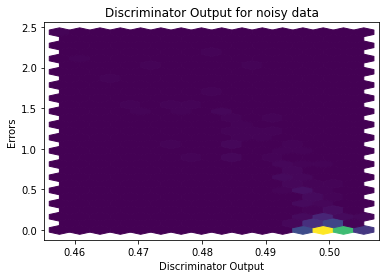

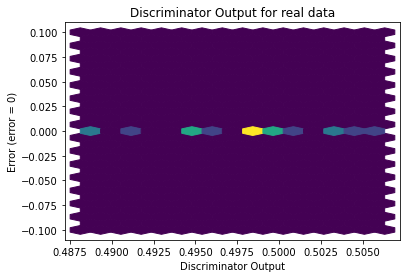

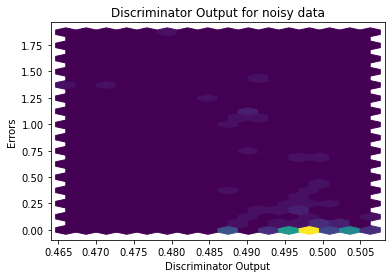

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4502]], requires_grad=True)
